<a href="https://colab.research.google.com/github/AMiller113/Machine_Learning/blob/master/ANN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tensorflow-gpu
import tensorflow as tf
tf.__version__

     |████████████████████████████████| 421.8MB 38kB/s 
     |████████████████████████████████| 450kB 46.1MB/s 
     |████████████████████████████████| 3.8MB 43.3MB/s 
     |████████████████████████████████| 81kB 10.9MB/s 
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.1 which is incompatible.


'2.1.0'

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [0]:
N = 1000
x = np.random.random((N, 2)) * 6 - 3
y = np.cos(2*x[:,0]) + np.cos(3*x[:,1])

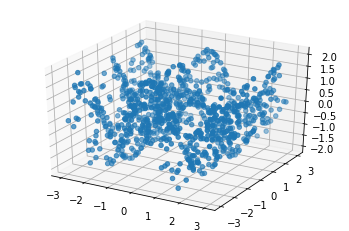

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0],x[:,1],y)

In [0]:
def learning_rate_schedule(epochs, lr):
  if epochs >= 150:
    return 0.001
  return 0.01

scheduler = tf.keras.callbacks.LearningRateScheduler(learning_rate_schedule) 

In [6]:
model = tf.keras.models.Sequential([tf.keras.layers.Input((x.shape[1],)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(1)]) #Not Logistic Regression
model.compile(optimizer=tf.keras.optimizers.Adam(.01), # Adam can be accessed without using the optimizer argument
              loss='mse')
r = model.fit(x, y, epochs = 300, callbacks=[scheduler])

Train on 1000 samples
Epoch 1/300
1000/1000 [==============================] - 0s 297us/sample - loss: 0.9333
Epoch 2/300
1000/1000 [==============================] - 0s 46us/sample - loss: 0.8980
Epoch 3/300
1000/1000 [==============================] - 0s 42us/sample - loss: 0.8561
Epoch 4/300
1000/1000 [==============================] - 0s 42us/sample - loss: 0.8649
Epoch 5/300
1000/1000 [==============================] - 0s 41us/sample - loss: 0.8403
Epoch 6/300
1000/1000 [==============================] - 0s 44us/sample - loss: 0.7746
Epoch 7/300
1000/1000 [==============================] - 0s 48us/sample - loss: 0.7278
Epoch 8/300
1000/1000 [==============================] - 0s 48us/sample - loss: 0.7368
Epoch 9/300
1000/1000 [==============================] - 0s 50us/sample - loss: 0.6605
Epoch 10/300
1000/1000 [==============================] - 0s 51us/sample - loss: 0.5985
Epoch 11/300
1000/1000 [==============================] - 0s 46us/sample - loss: 0.5646
Epoch 12/300
1000/

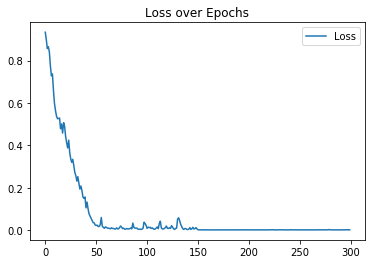

In [9]:
plt.plot(r.history['loss'], Label='Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()